In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipdb
import os
import bda_utils

In [2]:
config_df = pd.read_csv('./runs/config_df_70_569.csv', index_col=0)
config_df.columns = ['run', 'detector', 'mu', 't_pre']
config_df

,run,detector,mu,t_pre
0,70,0,0.0,3
1,71,0,0.0,4
2,72,0,0.0,5
3,73,0,0.0,6
4,74,0,0.0,7
...,...,...,...,...
495,565,9,0.9,3
496,566,9,0.9,4
497,567,9,0.9,5
498,568,9,0.9,6


# 对于每个detector

In [3]:
det = 8
data_det = config_df.loc[config_df['detector']==det]
data_det

,run,detector,mu,t_pre
400,470,8,0.0,3
401,471,8,0.0,4
402,472,8,0.0,5
403,473,8,0.0,6
404,474,8,0.0,7
405,475,8,0.1,3
406,476,8,0.1,4
407,477,8,0.1,5
408,478,8,0.1,6
409,479,8,0.1,7


## 关于$\mu$的敏感度分析

In [98]:
def plot_pre(t_pre):
    data_det_pre = data_det.loc[data_det['t_pre']==t_pre]

    s_a = pd.DataFrame([], columns=['mu', 't_pre', 'run', 'nrmse', 'mape', 'smape', 'mae'])

    for i in range(len(data_det_pre)):
        folder_name = 'run' + str(data_det_pre.iloc[i, 0])
        mu = data_det_pre.iloc[i, 2]

        g_t_bda = pd.read_csv('./runs/'+folder_name+'/bda_regression_g_t.csv', header=None).to_numpy()
        pred_bda = pd.read_csv('./runs/'+folder_name+'/bda_regression_pred_result.csv', header=None).to_numpy()
        nrmse = bda_utils.nrmse_loss_func(pred_bda, g_t_bda, 0)
        mape = bda_utils.mape_loss_func(pred_bda, g_t_bda, 0)
        smape = bda_utils.smape_loss_func(pred_bda, g_t_bda, 0)
        mae = bda_utils.mae_loss_func(pred_bda, g_t_bda, 0)

        s_a.loc[i, :] = np.array([mu, t_pre, data_det_pre.iloc[i, 0], nrmse, mape, smape, mae])

#     s_a[['nrmse', 'mape', 'smape', 'mae']].plot()
    return s_a

In [100]:
plot_pre(7)

,mu,t_pre,run,nrmse,mape,smape,mae
0,0.0,7.0,474.0,0.141464,0.409517,0.322995,0.107079
1,0.1,7.0,479.0,0.155764,0.625828,0.380531,0.126715
2,0.2,7.0,484.0,0.151704,0.542188,0.347708,0.12047
3,0.3,7.0,489.0,0.153584,0.613366,0.373941,0.12452
4,0.4,7.0,494.0,0.153176,0.573807,0.366442,0.122948
5,0.5,7.0,499.0,0.149591,0.579022,0.358663,0.119019
6,0.6,7.0,504.0,0.15332,0.570865,0.356824,0.123636
7,0.7,7.0,509.0,0.140115,0.448163,0.321912,0.107787
8,0.8,7.0,514.0,0.14909,0.597127,0.363446,0.119307
9,0.9,7.0,519.0,0.134541,0.414386,0.30538,0.101724


<AxesSubplot:>

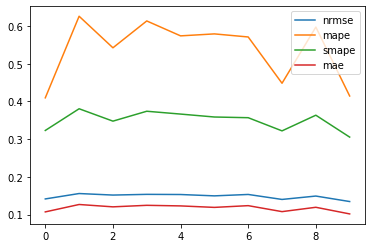

In [101]:
plot_pre(7)[['nrmse', 'mape', 'smape', 'mae']].plot()

In [103]:
min_loss_df = pd.DataFrame([], columns=['nrmse', 'mape', 'smape', 'mae'])

for t_pre in range(3, 8):
    s_a_pre = plot_pre(t_pre)
    loss_min = np.min(s_a_pre.to_numpy(), axis=0)[3:]
    min_loss_df.loc[t_pre-3, :] = loss_min

### base model

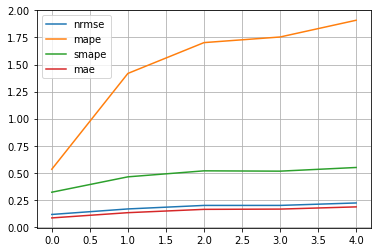

In [104]:
config_df_base = pd.read_csv('./runs_base/config_df_base.csv', index_col=0)
data_base_det = config_df_base.loc[config_df_base['detector']==det]
s_a_l_base = pd.DataFrame([], columns=['t_pre', 'nrmse', 'mape', 'smape', 'mae'])

for i in range(len(data_base_det)):
    folder_name = 'run' + str(data_base_det.iloc[i, 0])
    t_pre = data_base_det.iloc[i, 2]
    
    g_t_base = pd.read_csv('./runs_base/'+folder_name+'/base_regression_g_t.csv', header=None).to_numpy()
    pred_base = pd.read_csv('./runs_base/'+folder_name+'/base_regression_pred_result.csv', header=None).to_numpy()
    nrmse = bda_utils.nrmse_loss_func(pred_base, g_t_base, 0)
    mape = bda_utils.mape_loss_func(pred_base, g_t_base, 0)
    smape = bda_utils.smape_loss_func(pred_base, g_t_base, 0)
    mae = bda_utils.mae_loss_func(pred_base, g_t_base, 0)
    
    s_a_l_base.loc[i, :] = np.array([t_pre, nrmse, mape, smape, mae])
    
s_a_l_base[['nrmse', 'mape', 'smape', 'mae']].plot()
# plt.ylim(0, 0.5)
plt.grid()

## 关于往后predict几个label的敏感度分析

### bda model

In [105]:
def plot_mu(mu):
    data_det_mu = data_det.loc[abs(data_det['mu']-mu) < 1e-3]

    s_a = pd.DataFrame([], columns=['mu', 't_pre', 'nrmse', 'mape', 'smape', 'mae'])

    for i in range(len(data_det_mu)):
        folder_name = 'run' + str(data_det_mu.iloc[i, 0])
        t_pre = data_det_mu.iloc[i, 3]

        g_t_bda = pd.read_csv('./runs/'+folder_name+'/bda_regression_g_t.csv', header=None).to_numpy()
        pred_bda = pd.read_csv('./runs/'+folder_name+'/bda_regression_pred_result.csv', header=None).to_numpy()
        nrmse = bda_utils.nrmse_loss_func(pred_bda, g_t_bda, 0)
        mape = bda_utils.mape_loss_func(pred_bda, g_t_bda, 0)
        smape = bda_utils.smape_loss_func(pred_bda, g_t_bda, 0)
        mae = bda_utils.mae_loss_func(pred_bda, g_t_bda, 0)

        s_a.loc[i, :] = np.array([mu, t_pre, nrmse, mape, smape, mae])

#     s_a[['nrmse', 'mape', 'smape', 'mae']].plot()
    return s_a

# Analysis

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

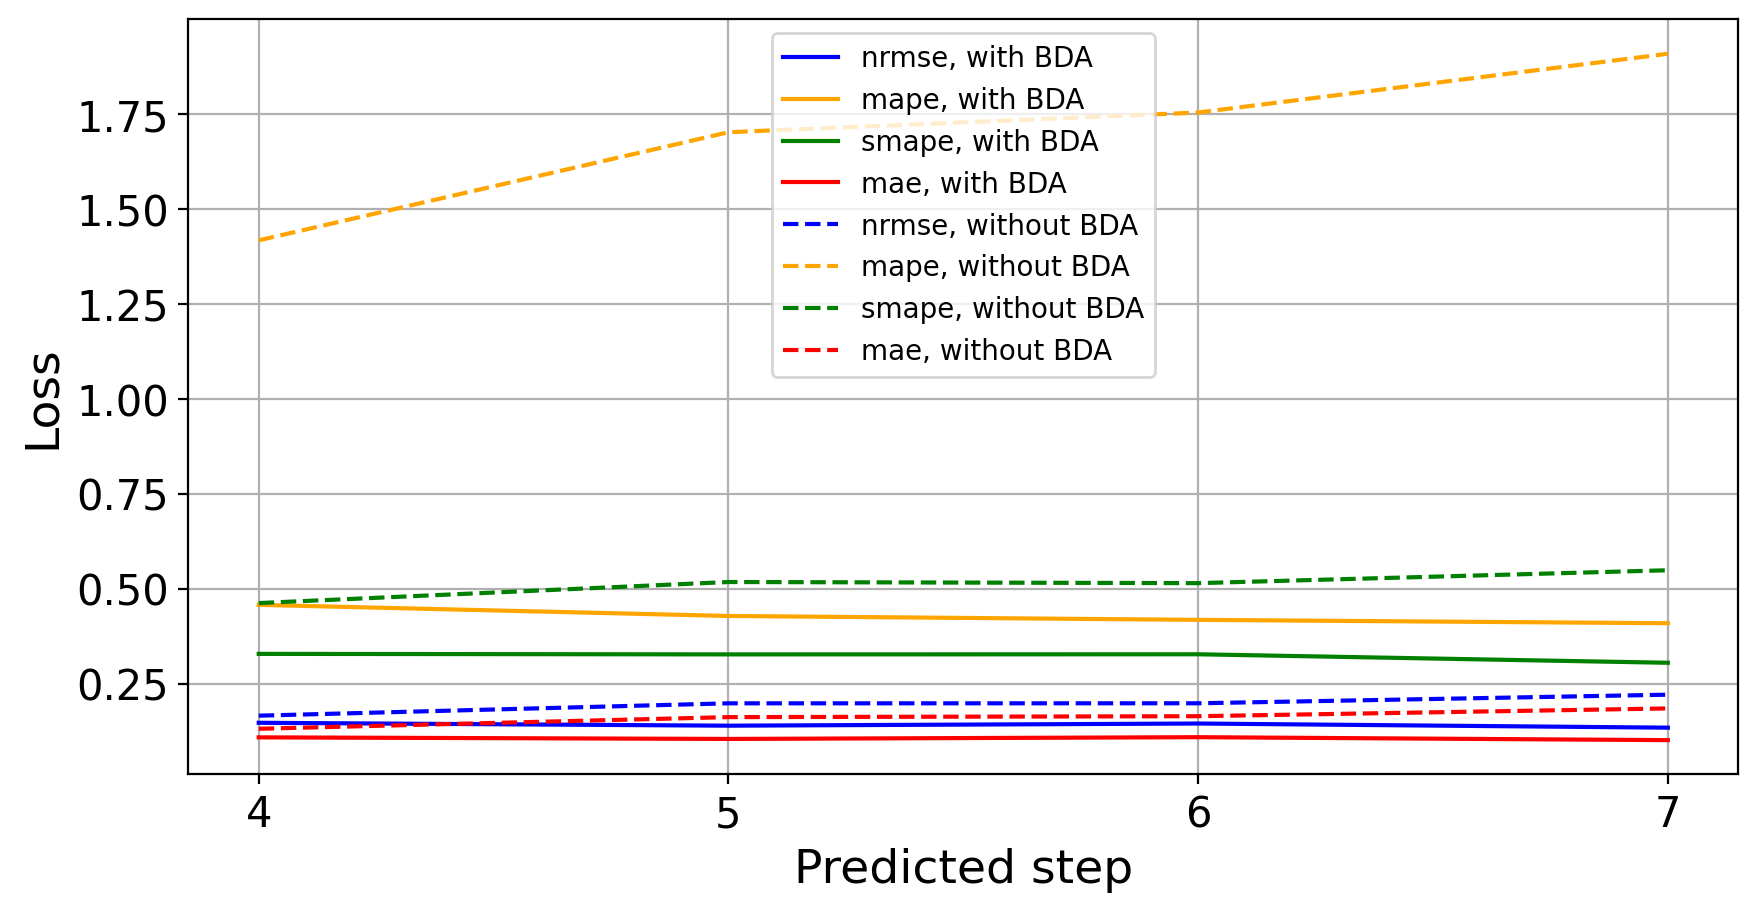

In [106]:
fig = plt.figure(figsize=[10,5], dpi=200)
ax = fig.add_subplot(111)
xtick = [4,5,6,7]
ax.plot(xtick, min_loss_df['nrmse'][1:], 'b', label='nrmse, with BDA')
ax.plot(xtick, min_loss_df['mape'][1:], 'orange', label='mape, with BDA')
ax.plot(xtick, min_loss_df['smape'][1:], 'g', label='smape, with BDA')
ax.plot(xtick, min_loss_df['mae'][1:], 'r', label='mae, with BDA')

ax.plot(xtick, s_a_l_base['nrmse'][1:], 'b--', label='nrmse, without BDA')
ax.plot(xtick, s_a_l_base['mape'][1:], '--', color='orange', label='mape, without BDA')
ax.plot(xtick, s_a_l_base['smape'][1:], 'g--', label='smape, without BDA')
ax.plot(xtick, s_a_l_base['mae'][1:], 'r--', label='mae, without BDA')
ax.legend(loc=9)
ax.grid()
ax.set_xlabel('Predicted step', fontsize=17)
ax.set_ylabel('Loss', fontsize=17)
ax.set_xticks(xtick)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.savefig('C:/Users/10169/iCloudDrive/Desktop/COTA/img/Loss vs t_pre %i.png'%det)

(0.0, 0.6)

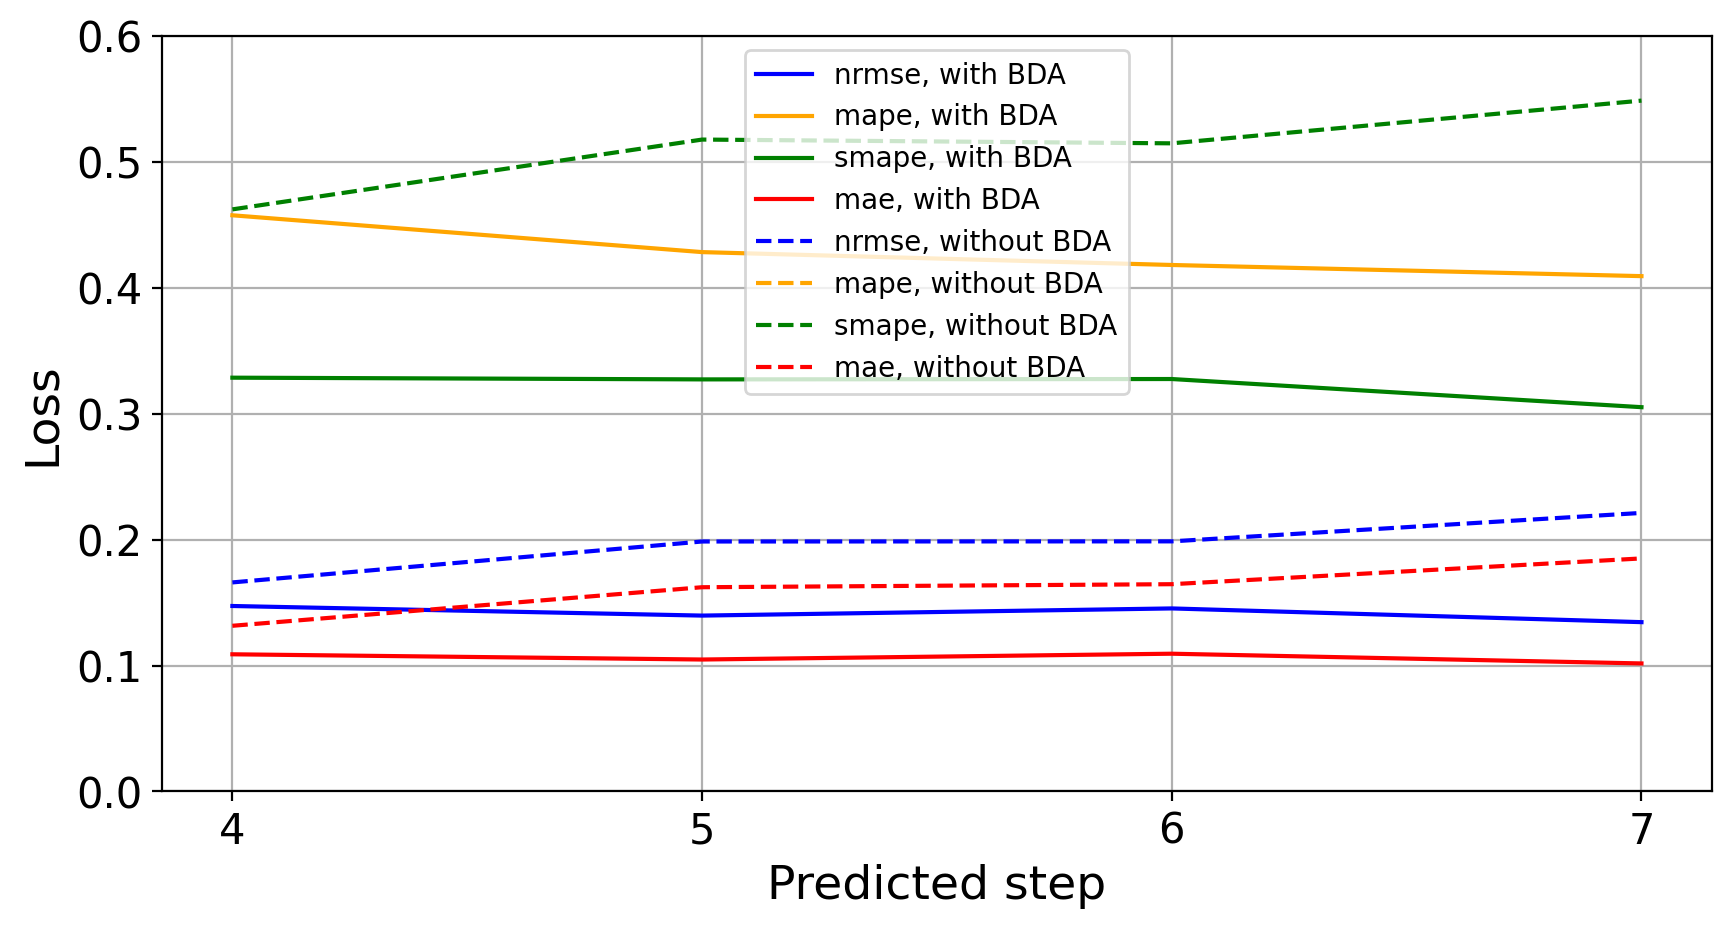

In [107]:
fig = plt.figure(figsize=[10,5], dpi=200)
ax = fig.add_subplot(111)
xtick = [4,5,6,7]
ax.plot(xtick, min_loss_df['nrmse'][1:], 'b', label='nrmse, with BDA')
ax.plot(xtick, min_loss_df['mape'][1:], 'orange', label='mape, with BDA')
ax.plot(xtick, min_loss_df['smape'][1:], 'g', label='smape, with BDA')
ax.plot(xtick, min_loss_df['mae'][1:], 'r', label='mae, with BDA')

ax.plot(xtick, s_a_l_base['nrmse'][1:], 'b--', label='nrmse, without BDA')
ax.plot(xtick, s_a_l_base['mape'][1:], '--', color='orange', label='mape, without BDA')
ax.plot(xtick, s_a_l_base['smape'][1:], 'g--', label='smape, without BDA')
ax.plot(xtick, s_a_l_base['mae'][1:], 'r--', label='mae, without BDA')
ax.legend(loc=9)
ax.grid()
ax.set_xlabel('Predicted step', fontsize=17)
ax.set_ylabel('Loss', fontsize=17)
ax.set_xticks(xtick)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_ylim([0, 0.6])
# plt.savefig('C:/Users/10169/iCloudDrive/Desktop/COTA/img/Loss vs t_pre zoomed %i.png'%det)

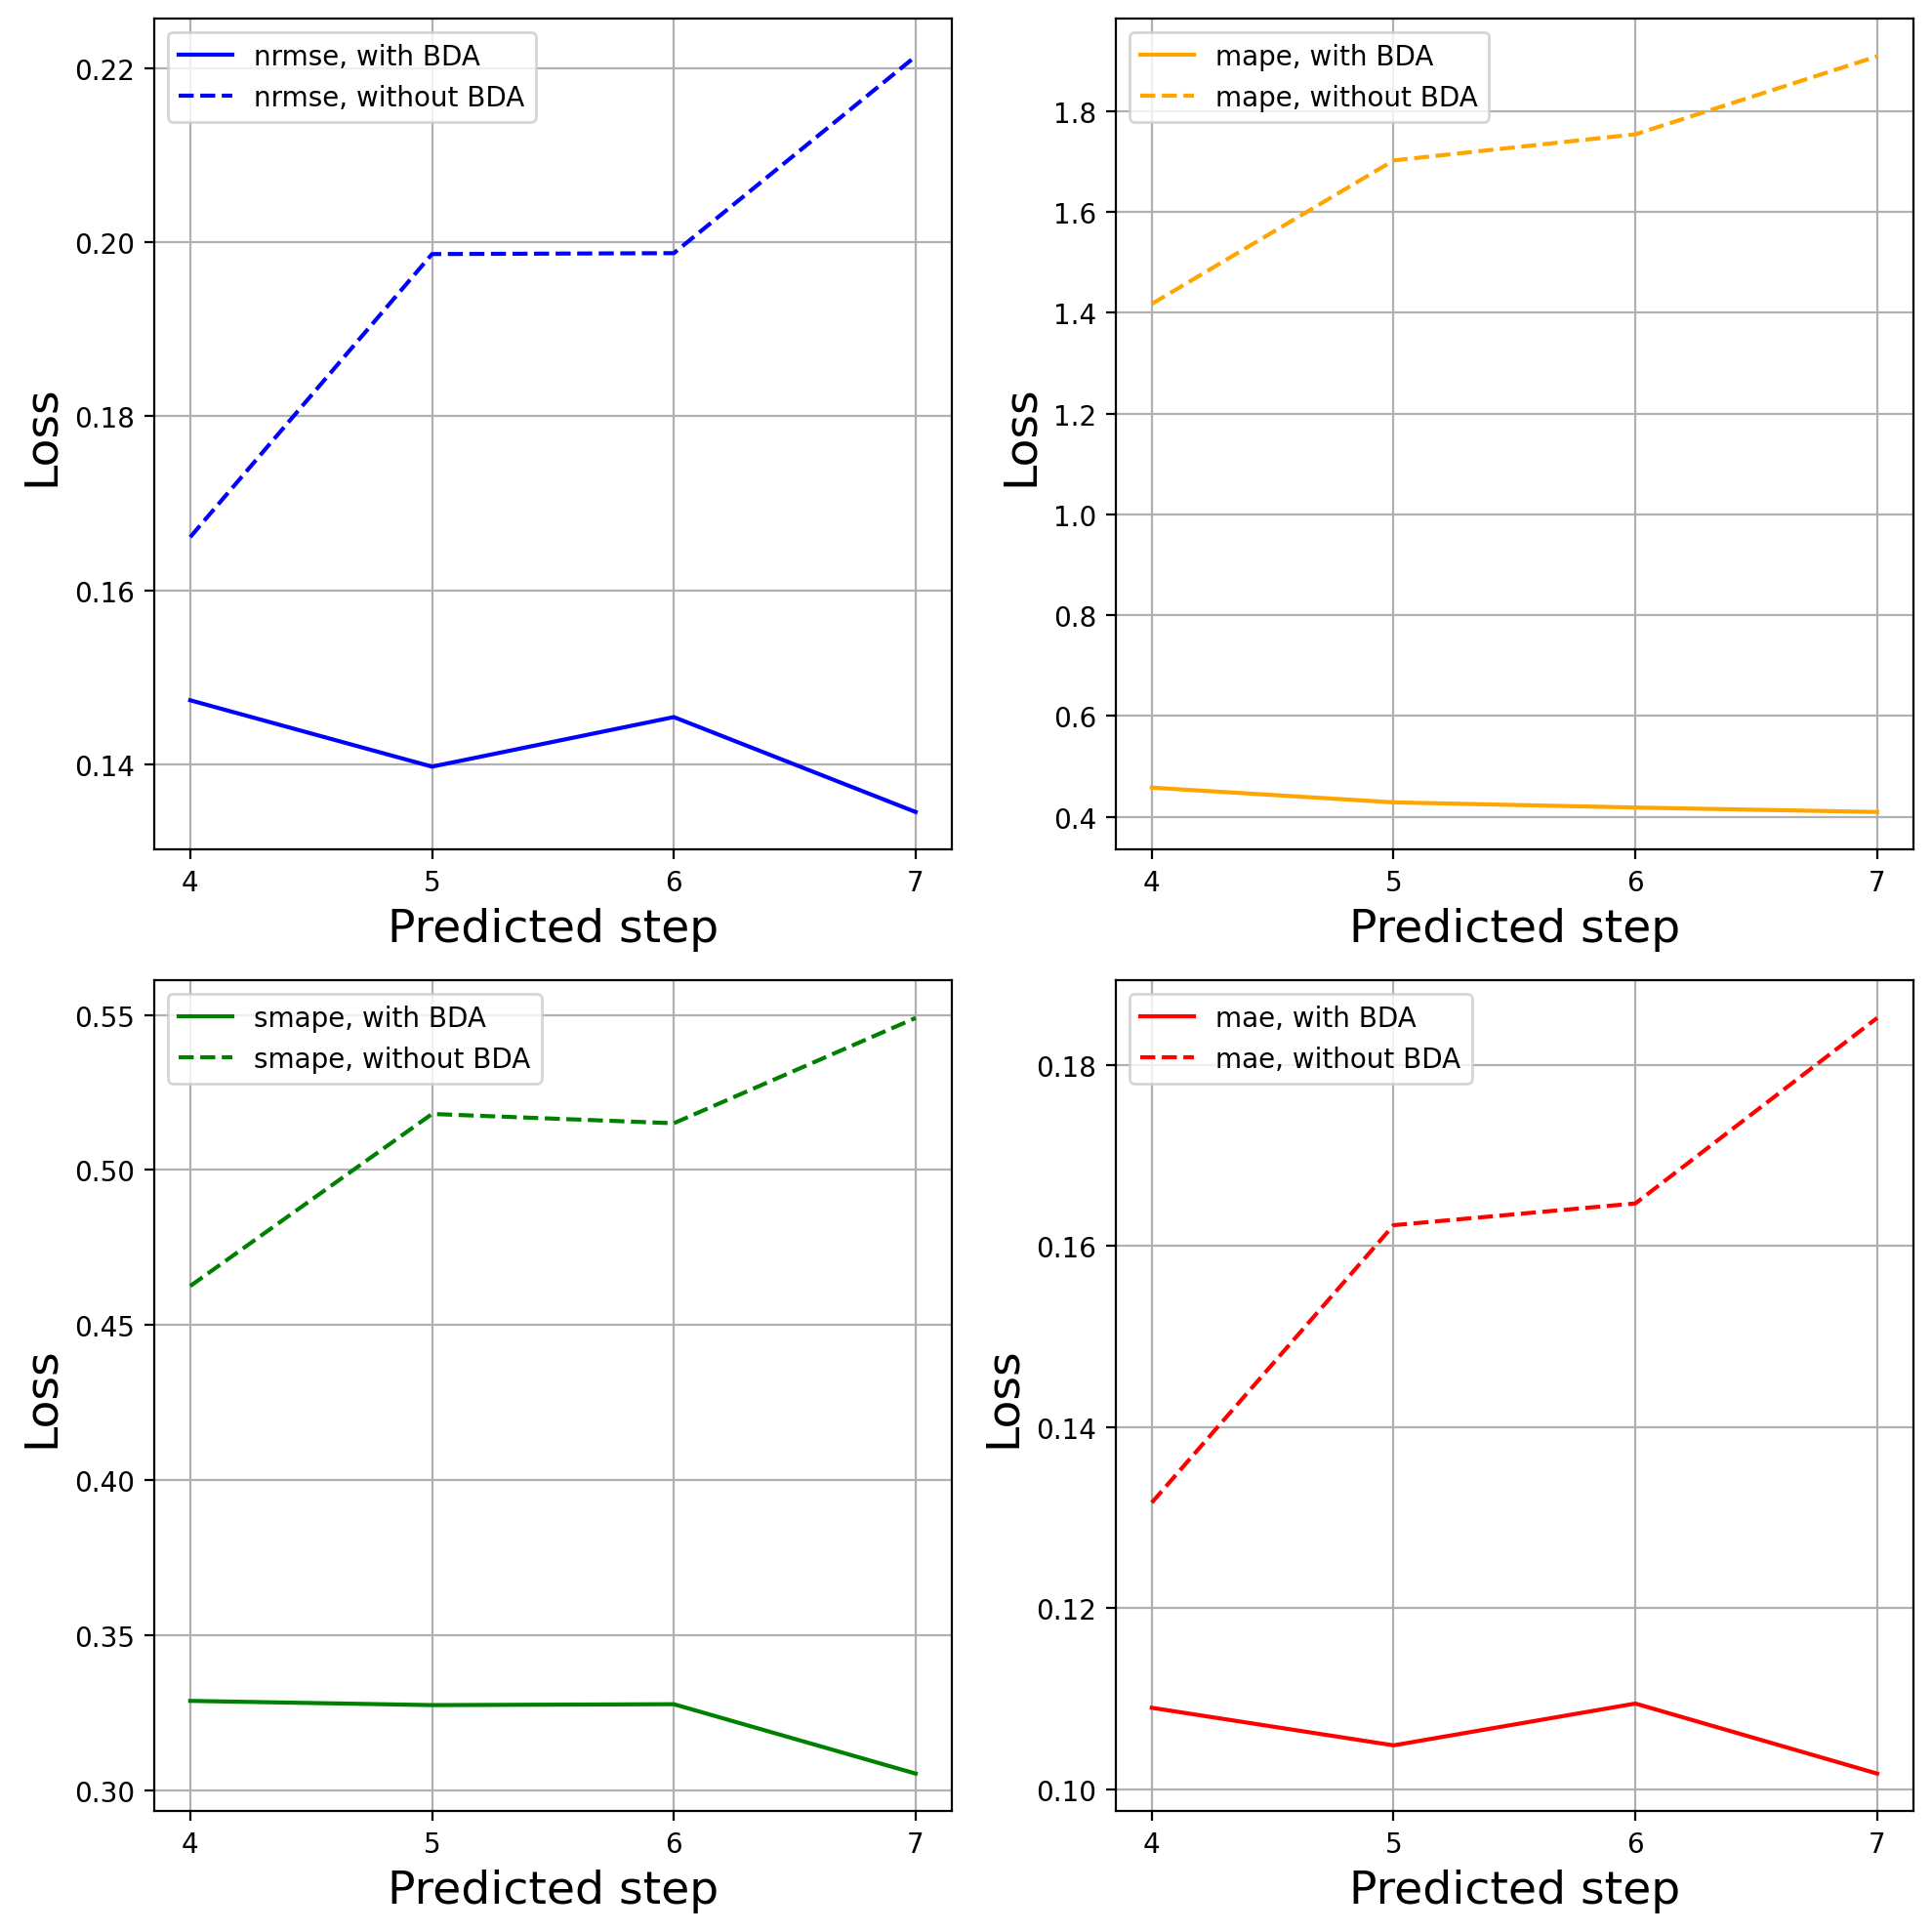

In [108]:
fig = plt.figure(figsize=[10,10], dpi=200)
xtick = [4,5,6,7]

ax1 = fig.add_subplot(221)
ax1.plot(xtick, min_loss_df['nrmse'][1:], 'b', label='nrmse, with BDA')
ax1.plot(xtick, s_a_l_base['nrmse'][1:], 'b--', label='nrmse, without BDA')
ax1.grid()
ax1.legend(loc=2)
ax1.set_xlabel('Predicted step', fontsize=17)
ax1.set_ylabel('Loss', fontsize=17)
ax1.set_xticks(xtick)

ax2 = fig.add_subplot(222)
ax2.plot(xtick, min_loss_df['mape'][1:], 'orange', label='mape, with BDA')
ax2.plot(xtick, s_a_l_base['mape'][1:], '--', color='orange', label='mape, without BDA')
ax2.grid()
ax2.legend(loc=2)
ax2.set_xlabel('Predicted step', fontsize=17)
ax2.set_ylabel('Loss', fontsize=17)
ax2.set_xticks(xtick)

ax3 = fig.add_subplot(223)
ax3.plot(xtick, min_loss_df['smape'][1:], 'g', label='smape, with BDA')
ax3.plot(xtick, s_a_l_base['smape'][1:], 'g--', label='smape, without BDA')
ax3.grid()
ax3.legend(loc=2)
ax3.set_xlabel('Predicted step', fontsize=17)
ax3.set_ylabel('Loss', fontsize=17)
ax3.set_xticks(xtick)

ax4 = fig.add_subplot(224)
ax4.plot(xtick, min_loss_df['mae'][1:], 'r', label='mae, with BDA')
ax4.plot(xtick, s_a_l_base['mae'][1:], 'r--', label='mae, without BDA')
ax4.grid()
ax4.legend(loc=2)
ax4.set_xlabel('Predicted step', fontsize=17)
ax4.set_ylabel('Loss', fontsize=17)
ax4.set_xticks(xtick)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
ax.set_ylim([0, 0.6])
plt.tight_layout()
# plt.savefig('C:/Users/10169/iCloudDrive/Desktop/COTA/img/Loss vs t_pre 4imgs %i.png'%det)

In [133]:
# run # , det=8, mu=0., t_pre=7
run = 509
label_seq_len = config_df.loc[config_df['run']==run, 't_pre'].values[0]
mu = config_df.loc[config_df['run']==run, 'mu'].values[0]
seq_len = 12

Xs = pd.read_csv('./runs/run'+str(run)+'/Xs.csv', header=None).to_numpy()
Xt = pd.read_csv('./runs/run'+str(run)+'/Xt.csv', header=None).to_numpy()
Xs_new = pd.read_csv('./runs/run'+str(run)+'/Xs_new.csv', header=None).to_numpy()
Xt_new = pd.read_csv('./runs/run'+str(run)+'/Xt_new.csv', header=None).to_numpy()

Xs_3d, Ys_3d = bda_utils.sliding_window(Xs, Xs, seq_len, label_seq_len)  
Xt_3d, Yt_3d = bda_utils.sliding_window(Xt, Xt, seq_len, label_seq_len)


Ys_3d = Ys_3d[:, label_seq_len-1:, :]
Yt_3d = Yt_3d[:, label_seq_len-1:, :]

In [134]:
from sklearn.manifold import TSNE
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [135]:
def cal_conditional_dist(Xs, ys, Xt, yt):
    ys = bda_utils.get_class(ys.flatten())
    yt = bda_utils.get_class(yt.flatten())
    dist = 0
    for c in range(101):
        ind_s = bda_utils.get_class(ys.flatten())==c
        ind_t = bda_utils.get_class(yt.flatten())==c
        
        Xs_c = Xs[np.where(ind_s==True)[1], :]
        Xt_c = Xt[np.where(ind_t==True)[1], :]
        if Xs_c.shape[0]==0 and Xt_c.shape[0]!=0:
            dist_c = np.abs( - Xt_c.mean()/Xt_c.flatten().shape[0])
        elif Xs_c.shape[0]!=0 and Xt_c.shape[0]==0:
            dist_c = np.abs(Xs_c.mean()/Xs_c.flatten().shape[0])
        elif Xs_c.shape[0]!=0 and Xt_c.shape[0]!=0:
            dist_c = np.abs(Xs_c.mean()/Xs_c.flatten().shape[0] - Xt_c.mean()/Xt_c.flatten().shape[0])
        else:
            dist_c = 0
        dist += dist_c**2
    return dist

In [136]:
Xt_new.shape

(462, 8)

Text(0.15, 0.45, "D(Ts', Tt')=35.343*10^-5")

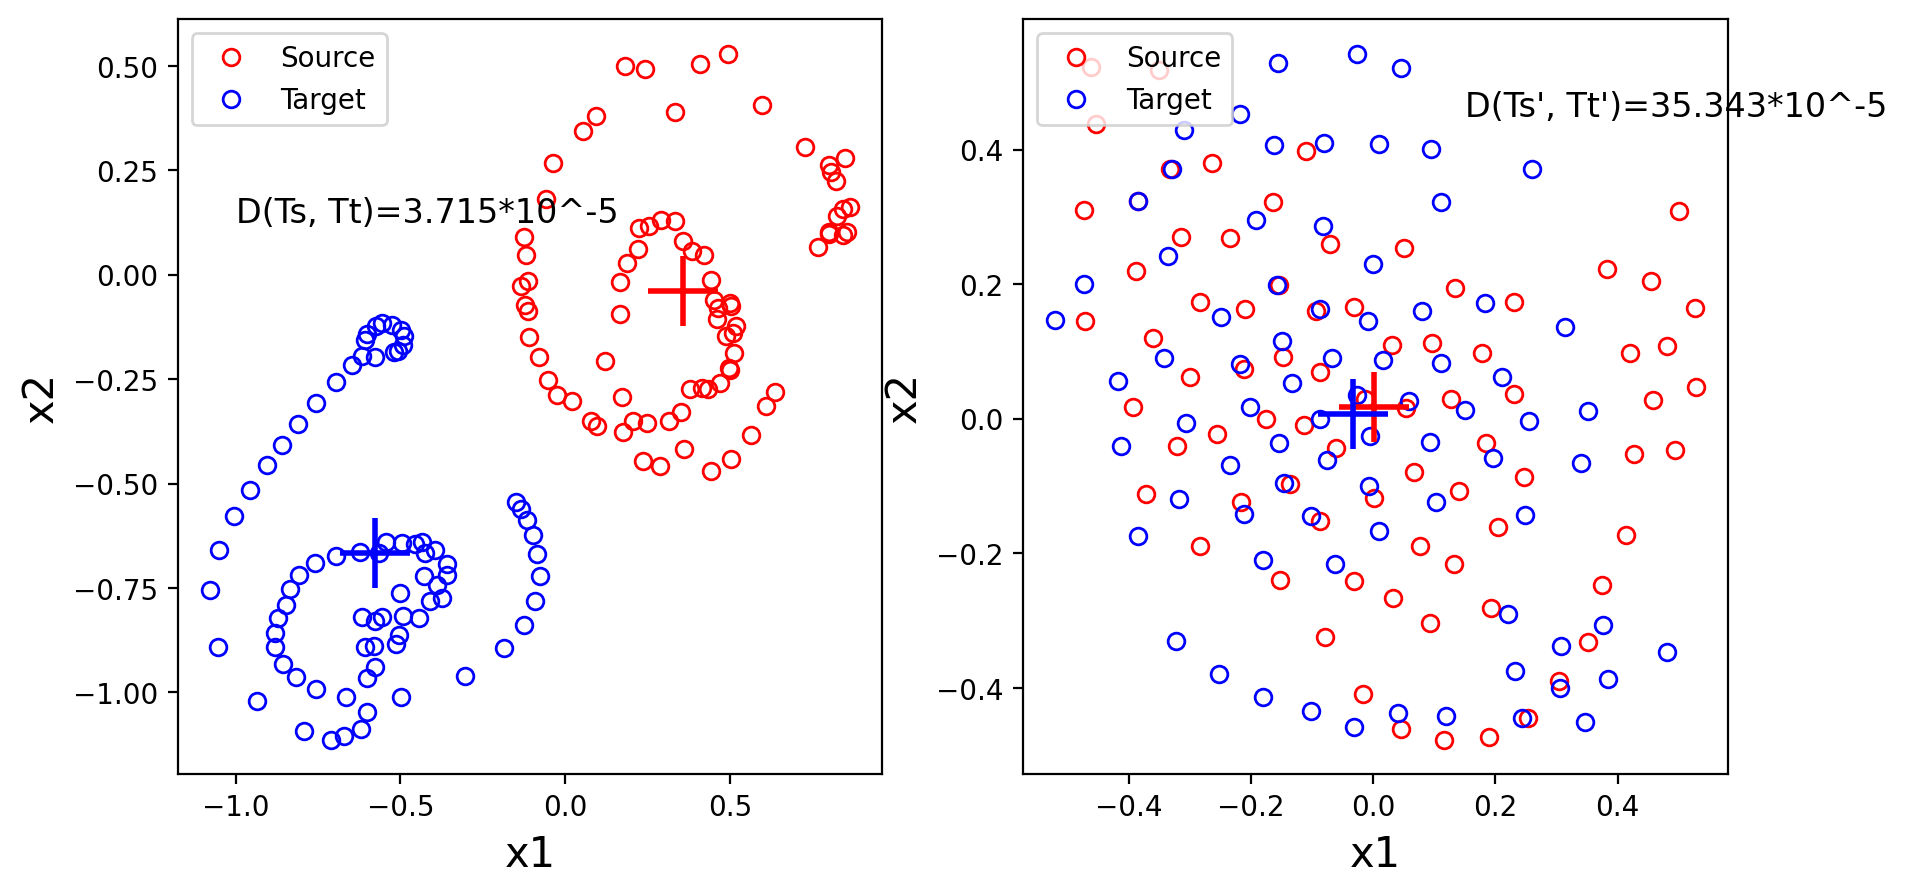

In [137]:
rs=32
dpi=200
bda_utils.setup_seed(rs)

pca_tsne = TSNE(n_components=2)  
Xs_2D = bda_utils.normalize2D_tSNE(pca_tsne.fit_transform(Xs_3d[:, :, 0]))[0]
Xt_2D = bda_utils.normalize2D_tSNE(pca_tsne.fit_transform(Xt_3d[:Xs_3d.shape[0], :, 0]))[0]
fig = plt.figure(figsize=[10, 5], dpi=dpi)
ax1 = fig.add_subplot(121)
ax1.plot(Xs_2D[:, 0], Xs_2D[:, 1], 'ro', markerfacecolor='none', label='Source')
ax1.plot(Xt_2D[:, 0], Xt_2D[:, 1], 'bo', markerfacecolor='none', label='Target')
ax1.plot(Xs_2D[:, 0].mean(), Xs_2D[:, 1].mean(), 'r+', markersize=25, markeredgewidth=2)
ax1.plot(Xt_2D[:, 0].mean(), Xt_2D[:, 1].mean(), 'b+', markersize=25, markeredgewidth=2)
ax1.set_xlabel('x1', fontsize=15)
ax1.set_ylabel('x2', fontsize=15)
ax1.legend(loc=2)
marg_dist = (np.mean(Xs_2D.flatten())/Xs_2D.flatten().shape[0] - np.mean(Xt_2D.flatten())/Xt_2D.flatten().shape[0])**2
cond_dist = cal_conditional_dist(Xs_3d[:, :, 0], Ys_3d, Xt_3d[:, :, 0], Yt_3d)
ax1.text(-1, 0.125, 'D(Ts, Tt)=%.3f*10^-5'%( 100000*((1-mu)*marg_dist + mu*cond_dist) ), fontsize=12)

Xs_new_2D = bda_utils.normalize2D_tSNE(pca_tsne.fit_transform(Xs_new))[0]
Xt_new_2D = bda_utils.normalize2D_tSNE(pca_tsne.fit_transform(Xt_new[:Xs_new.shape[0], :]))[0]
ax2 = fig.add_subplot(122)
ax2.plot(Xs_new_2D[:, 0], Xs_new_2D[:, 1], 'ro', markerfacecolor='none', label='Source')
ax2.plot(Xt_new_2D[:, 0], Xt_new_2D[:, 1], 'bo', markerfacecolor='none', label='Target')
ax2.plot(Xs_new_2D[:, 0].mean(), Xs_new_2D[:, 1].mean(), 'r+', markersize=25, markeredgewidth=2)
ax2.plot(Xt_new_2D[:, 0].mean(), Xt_new_2D[:, 1].mean(), 'b+', markersize=25, markeredgewidth=2)
ax2.set_xlabel('x1', fontsize=15)
ax2.set_ylabel('x2', fontsize=15)
ax2.legend(loc=2)
marg_dist = (np.mean(Xs_new_2D.flatten())/Xs_new_2D.flatten().shape[0] - np.mean(Xt_new_2D.flatten())/Xt_new_2D.flatten().shape[0])**2
cond_dist = cal_conditional_dist(Xs_new, Ys_3d, Xt_new, Yt_3d)
ax2.text(0.15, 0.45, 'D(Ts\', Tt\')=%.3f*10^-5'%( 100000*((1-mu)*marg_dist + mu*cond_dist) ), fontsize=12)


In [138]:
cal_conditional_dist(Xs_3d[:, :, 0], Ys_3d, Xt_3d[:, :, 0], Yt_3d)

4.2331084534916554e-05

In [139]:
cal_conditional_dist(Xs_new, Ys_3d, Xt_new, Yt_3d)

0.0005048865259281786

In [88]:
Xt_new.shape

(462, 8)

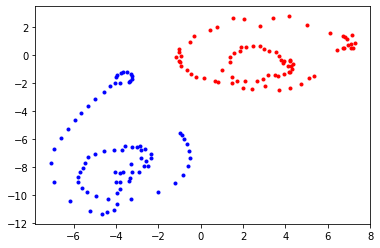

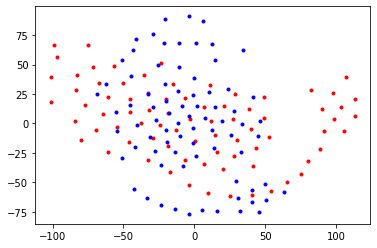

In [213]:

plt.figure()
plt.plot(Xs_2D[:, 0], Xs_2D[:, 1], 'r.', label='Source')
plt.plot(Xt_2D[:, 0], Xt_2D[:, 1], 'b.', label='Target')

pca_tsne = TSNE(n_components=2)  
plt.figure()x
plt.plot(Xs_new_2D[:, 0], Xs_new_2D[:, 1], 'r.', label='Source')
plt.plot(Xt_new_2D[:, 0], Xt_new_2D[:, 1], 'b.', label='Target')

# MMD

In [153]:
np.abs(np.mean(Xs_3d.flatten())/Xs_3d.flatten().shape[0] - np.mean(Xt_3d.flatten())/Xt_3d.flatten().shape[0])

0.0023756415265894296

In [154]:
np.abs(np.mean(Xs_new.flatten())/Xs_new.flatten().shape[0] - np.mean(Xt_new.flatten())/Xt_new.flatten().shape[0])

0.0007220305727510558

In [46]:
Xs_3d.shape

(78, 12, 1)

In [61]:
bda_utils.get_class(Ys_3d.flatten())

array([[ 6.,  9., 14., 24., 33., 47., 65., 82., 87., 90., 88., 86., 85.,
        80., 77., 70., 66., 69., 61., 65., 52., 44., 42., 42., 40., 39.,
        34., 35., 34., 31., 30., 28., 33., 29., 28., 26., 28., 31., 29.,
        34., 31., 31., 27., 27., 36., 33., 31., 40., 43., 44., 45., 52.,
        48., 51., 53., 49., 50., 44., 42., 33., 28., 25., 25., 24., 19.,
        17., 18., 18., 13., 15., 12., 14., 11., 11., 10.,  9.,  8.,  6.]])

In [77]:
tt = bda_utils.get_class(Ys_3d.flatten())==32
Xs_3d[:, :, 0][np.where(tt==True)[1], :].shape

(0, 12)

In [86]:
cal_conditional_dist(Xs_3d, Ys_3d, Xt_3d, Yt_3d)

0.009200878395756867